<a href="https://colab.research.google.com/github/josephDeluna/BioInfPrj1-Aliivibrio-Fischeri-Genomic-Analysis/blob/main/Analyzing_the_Basic_Characteristics_of_Aliivibrio_fischeri's_Genome_GC_Content%2C_and_Nucleotide_Composition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of the Key Genomic Features of Aliivibrio fischeri: Examination of GC Content and Nucleotide Composition

 <img src="https://www.microbiotests.com/wp-content/uploads/2021/03/Aliivibrio-fischeri_Vibrio-fischeri-toxicty-test-1024x683.jpg" alt="Aliivibrio fischeri" align="right" width="250" style="height:240px">

The objective of this project is to examine the fundamental properties of the DNA sequence of Aliivibrio fischeri, a marine bacterium known for its bioluminescence. The project focuses on two key aspects, including GC content, and nucleotide composition, which provide insight into the stability and melting temperature of DNA, gene expression regulation, genetic code, evolutionary history, and genome functions. This project involves the retrieval of the DNA sequence from a publicly available database, the use of basic Python code to determine the GC content and nucleotide composition.

 


In [ ]:
#@title Imports, Installations, Functions, and File Preparation
!pip install biopython
!pip install wget
from google.colab import drive
from Bio import SeqIO
from matplotlib.font_manager import FontProperties
from prettytable import PrettyTable
from itertools import combinations
import wget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gzip
import statistics
import scipy.stats as stats

def find_ssr_locations(sequence, ssrs):
    locations = {}
    for ssr in ssrs:
        ssr_locations = []
        for i in range(len(sequence)):
            if sequence[i:i+len(ssr)] == ssr:
                ssr_locations.append(i)
        locations[ssr] = ssr_locations
    return locations


url = 'https://github.com/josephDeluna/BioInfPrj1-Aliivibrio-Fischeri-Genomic-Analysis/raw/main/DataSets/Aliivibriofischeri.fna.gz'
filename = 'Aliivibriofischeri.fna.gz'
wget.download(url, filename)
with gzip.open(filename, 'rt') as f:
    for record in SeqIO.parse(f, 'fasta'):
        nucleotide_sequence = str(record.seq)
  
print(nucleotide_sequence)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=f801a503a0f99d32941784b6452db9d9752ea6797527fba0974f1c6b57ca47c9
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
TTAATACCTTGTTGACGCCTTTTCTTTTTTTTCTTTCTCTTTTTTTCTTTTTCTTTTTTTTACGCGCAAGCGCGGCCAAATAGGAAATGAAGCGTTATCAGCGATCACCTATACCCCTTACTCCCCTTTGTTATGTTGTACCCTAGCATGAGTGGTTAGTGGTGACGCTGTCACAGTAATACTTTTTCTACTATATTTGTACGTAACCTTATGGTTGAATTTTTTTCCGAAAAACCAAATCACTCATTAAATTTAAAGTAGTATGCTTACCTAATTGCCCATCAATTAATCTATATTGAACGAACCTCATTCCCTTTAGCTTAAAATCTACTTCTACTGGATGTTACTTTCTAAAGGCCAAACCATTTCTACTGGATGTTACTTTCCAAAGACAAACCACTTCTACTG

## Basic Characteristics




In [ ]:
#@title Length
seq_length = len(nucleotide_sequence)
print("The length of A. fischeri genome is", seq_length, "base pairs (bp)")
print("The length of A. fischeri genome is", seq_length/1000000, "Megabases (Mb)")

The length of A. fischeri genome is 179459 base pairs (bp)
The length of A. fischeri genome is 0.179459 Megabases (Mb)


Tettelin et al. (2005) conducted a study on bacterial genomes and found that 
these genomes vary in size, ranging from 0.16 Mb to 13.02 Mb. The average size of bacterial genomes was found to be around 4.1 Mb. In comparison, the Aliivibrio fischeri genome, which is approximately 0.18 Mb in size, is relatively smaller compared to the median size of bacterial genomes.

Kuo and Ochman (2009) suggest that bacteria with small genome sizes tend to have faster growth rates, simpler metabolic systems, and lower gene numbers. However, it is important to note that the correlation between genome size and organism complexity is not always clear-cut, as some bacteria with small genomes can still exhibit complex behaviors (Doolittle & Zhaxybayeva, 2010).

---




In [ ]:
#@title GC Content
gc_content = round((nucleotide_sequence.count('G') + nucleotide_sequence.count('C')) / seq_length * 100, 2)
print("A. fischeri genome contains", gc_content ,"percent of GC bases")

A. fischeri genome contains 34.8 percent of GC bases


In general, a higher GC content is associated with greater DNA stability and higher melting temperatures. However, the significance of GC content can vary depending on the organism and other factors. The GC content of A. fischeri is relatively low at 34.8%, compared to the average GC content of bacterial genomes which is around 50%. While it is not clear if this relatively low GC content has any functional implications, further research is needed to fully understand its significance in A. fischeri.

---



A.fischeri genome composed of {'A': 55473, 'C': 29251, 'G': 33199, 'T': 61536}


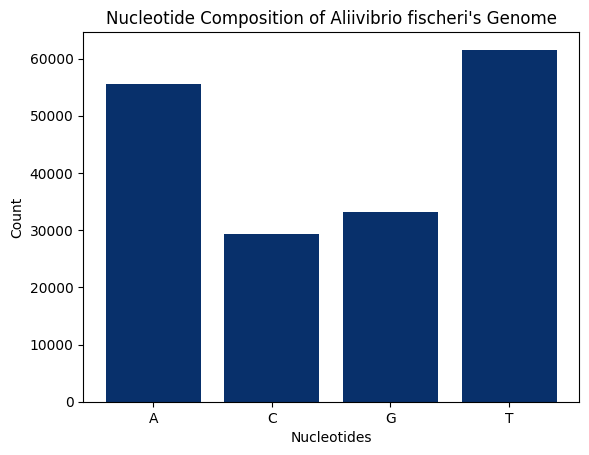

In [ ]:
#@title Nucleotide Composition
nt_counts = {'A': nucleotide_sequence.count('A'), 'C': nucleotide_sequence.count('C'), 'G': nucleotide_sequence.count('G'), 'T': nucleotide_sequence.count('T')}
print("A.fischeri genome composed of", nt_counts)

plt.bar(nt_counts.keys(), nt_counts.values(), color= "#08306b")
plt.title("Nucleotide Composition of Aliivibrio fischeri's Genome")
plt.xlabel("Nucleotides") 
plt.ylabel("Count") 
plt.show() 

The nucleotide composition of a genome can have various implications on gene expression, protein structure, and evolution. This includes the impact on codon usage bias and the efficiency of translation, as well as the stability and melting temperature of DNA during transcription and replication. Furthermore, the nucleotide composition can provide insights into the evolutionary history and relationships with other organisms. However, the significance of nucleotide composition can vary based on the organism, and further research is necessary to determine its specific functional implications in A. fischeri.


---



##Nucleotide Mapping

In [ ]:
#@title Nucleotide Locations
A_locations = find_ssr_locations(nucleotide_sequence, "A")
C_locations = find_ssr_locations(nucleotide_sequence, "C")
G_locations = find_ssr_locations(nucleotide_sequence, "G")
T_locations = find_ssr_locations(nucleotide_sequence, "T")

# Printing A_locations
print("A_locations:")
for key, value in A_locations.items():
    print(key, ":", value)

# Printing C_locations
print("C_locations:")
for key, value in C_locations.items():
    print(key, ":", value)

# Printing G_locations
print("G_locations:")
for key, value in G_locations.items():
    print(key, ":", value)

# Printing T_locations
print("T_locations:")
for key, value in T_locations.items():
    print(key, ":", value)

A_locations:
A : [2, 3, 5, 14, 61, 67, 68, 77, 78, 79, 81, 84, 85, 86, 89, 90, 96, 99, 103, 106, 110, 112, 119, 132, 139, 144, 147, 150, 157, 164, 172, 174, 177, 178, 180, 189, 192, 194, 200, 204, 205, 210, 217, 218, 229, 230, 231, 232, 233, 236, 237, 238, 241, 245, 248, 249, 250, 254, 255, 256, 259, 262, 268, 272, 273, 280, 283, 284, 287, 288, 292, 294, 298, 299, 302, 303, 308, 317, 322, 323, 324, 325, 329, 335, 340, 345, 352, 353, 354, 359, 360, 361, 364, 370, 375, 380, 387, 388, 389, 391, 393, 394, 395, 398, 404, 409, 414, 421, 422, 423, 425, 427, 428, 429, 432, 438, 443, 448, 455, 456, 457, 459, 461, 463, 466, 477, 482, 489, 490, 491, 493, 495, 497, 500, 511, 516, 523, 524, 525, 526, 529, 530, 531, 534, 540, 545, 550, 557, 558, 559, 560, 564, 565, 566, 568, 575, 580, 585, 592, 593, 594, 595, 599, 600, 601, 604, 610, 615, 620, 627, 628, 629, 630, 634, 635, 636, 638, 645, 650, 655, 662, 663, 664, 665, 669, 670, 671, 673, 680, 685, 690, 697, 698, 699, 700, 704, 705, 706, 708, 715, 720

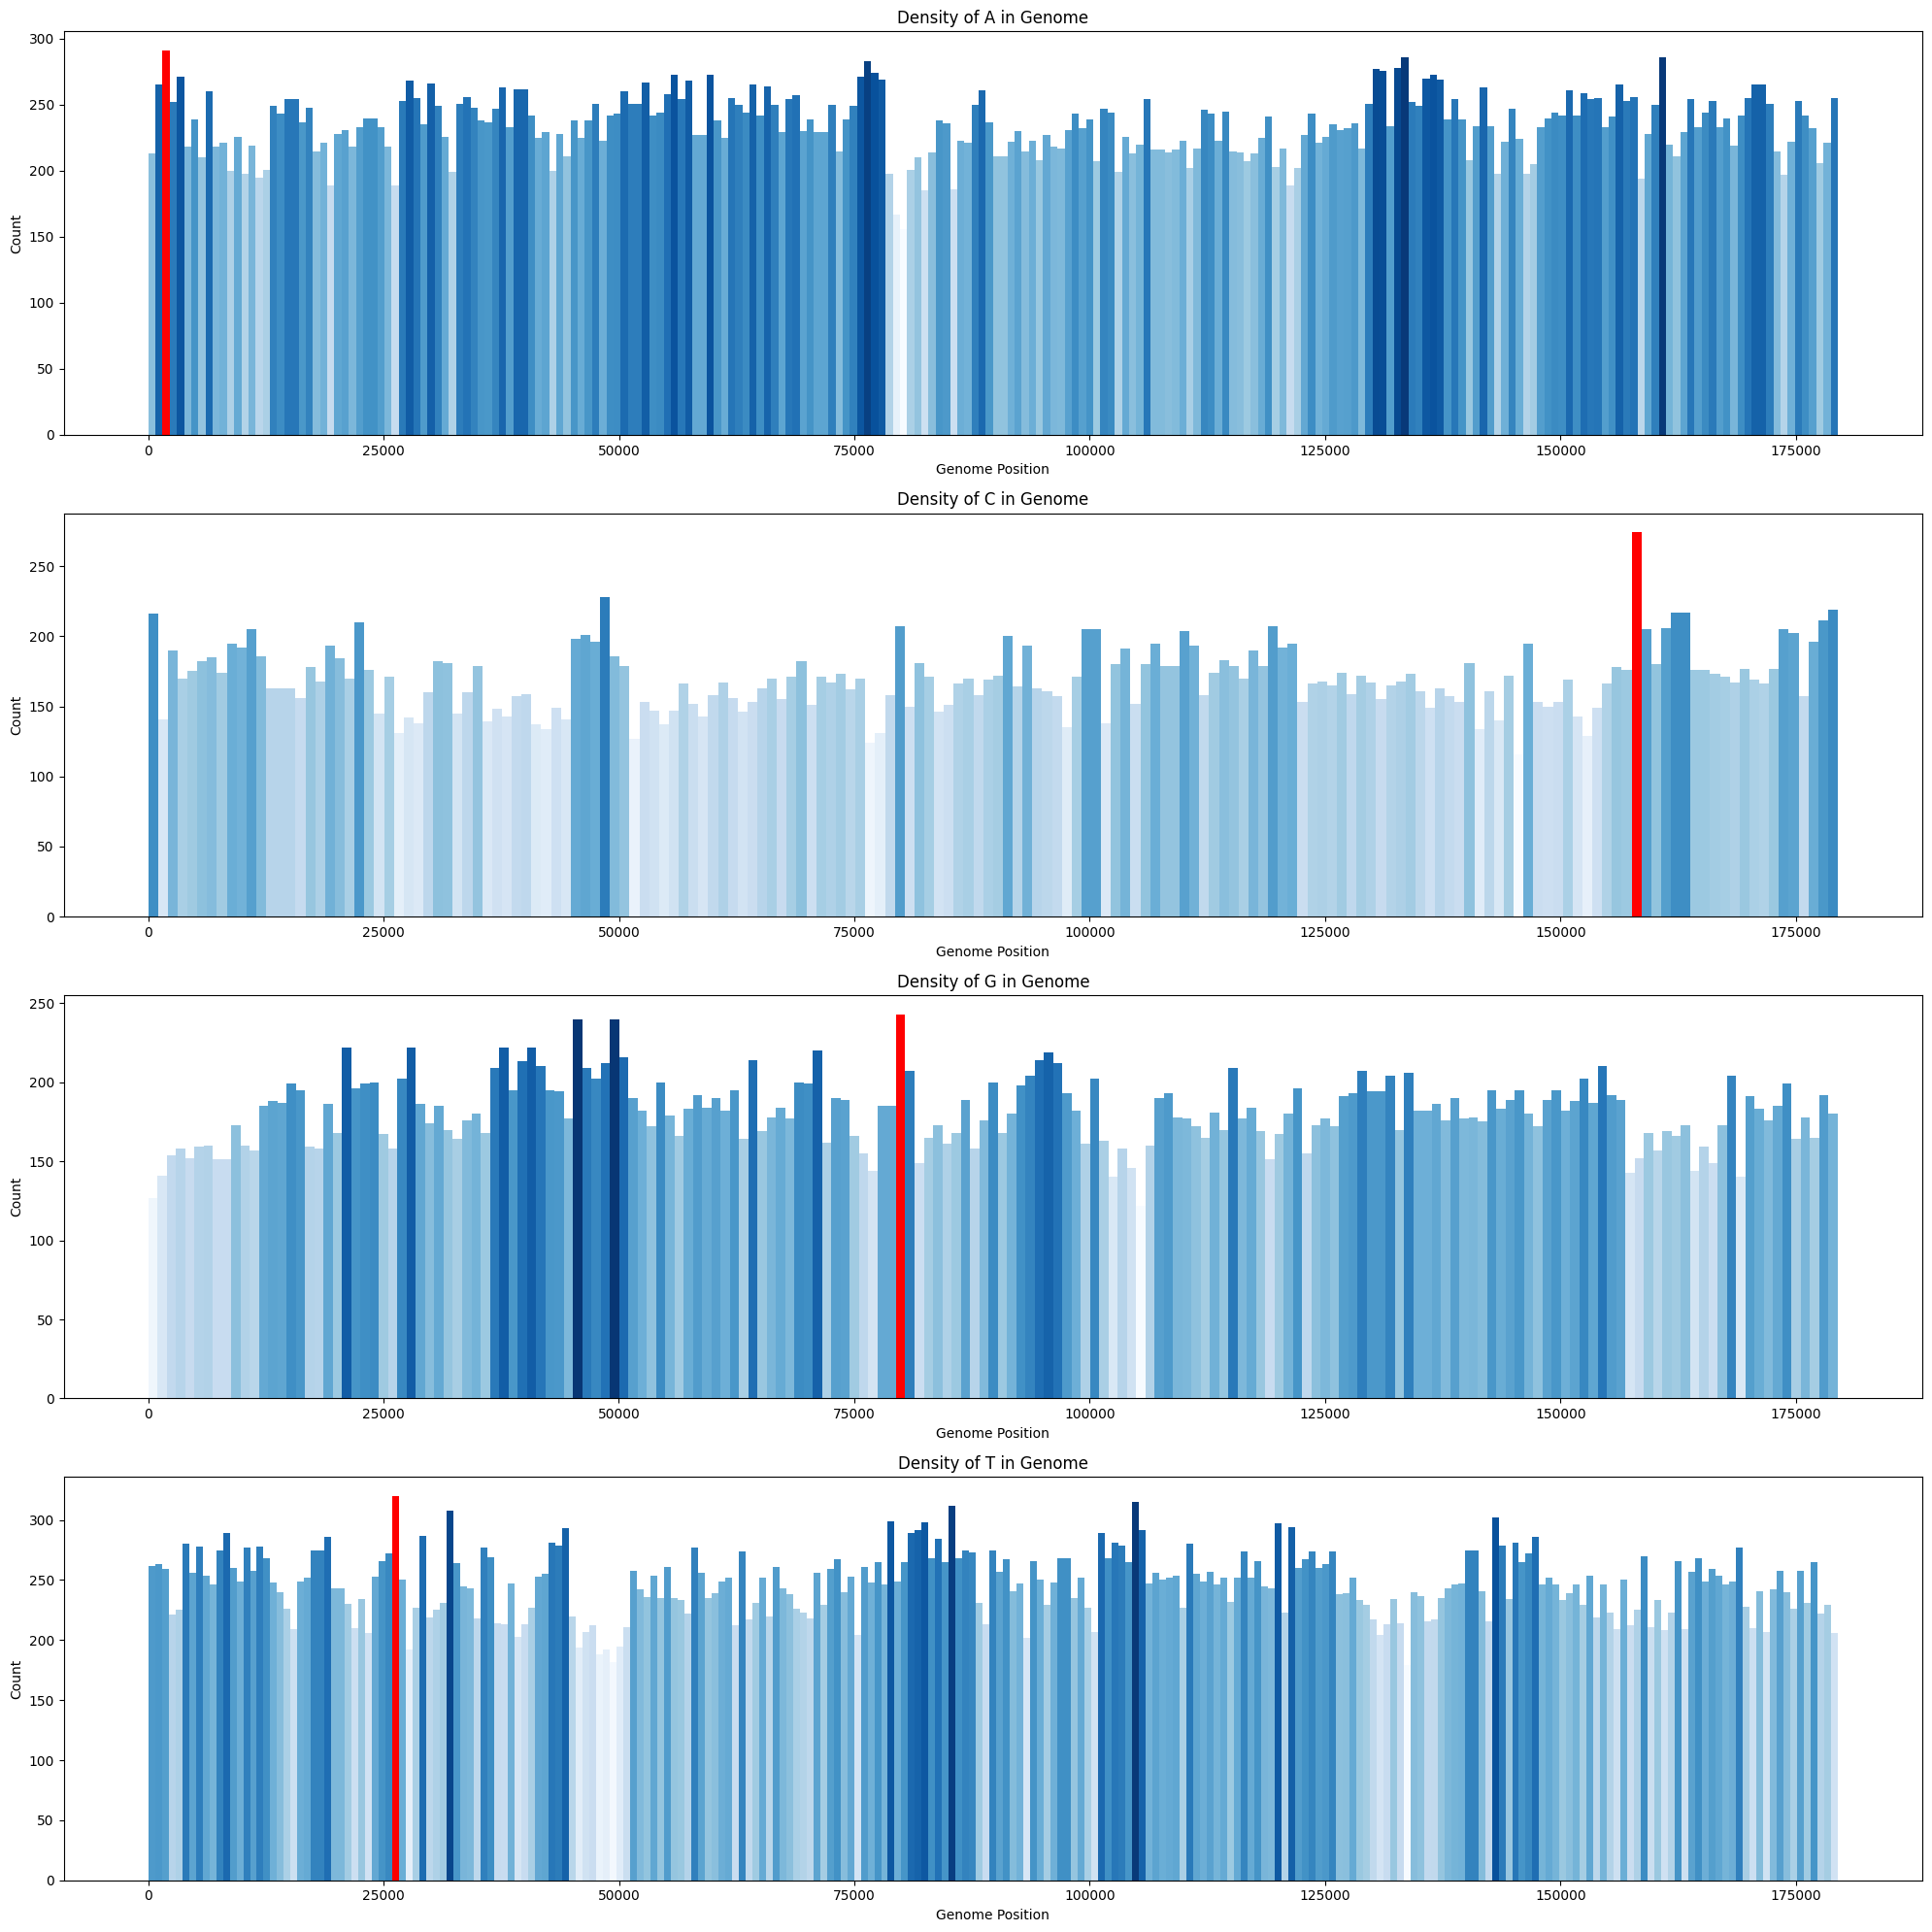

In [ ]:
#@title Nitrogenous Bases Density Map
import matplotlib.pyplot as plt

# Plotting A


fig, axes = plt.subplots(4, 1, figsize=(20, 20))

# Plotting A
ax = axes[0]
n, bins, patches = ax.hist(A_locations['A'], bins=236)
norm = plt.Normalize(n.min(), n.max())

for count, patch in zip(n, patches):
    if count == n.max():
        patch.set_fc('red')
    else:
        patch.set_facecolor(plt.cm.Blues(norm(count)))

ax.set_xlabel('Genome Position')
ax.set_ylabel('Count')
ax.set_title('Density of A in Genome')

# Plotting C
ax = axes[1]
n, bins, patches = ax.hist(C_locations['C'], bins=172)
norm = plt.Normalize(n.min(), n.max())

for count, patch in zip(n, patches):
    if count == n.max():
        patch.set_fc('red')
    else:
        patch.set_facecolor(plt.cm.Blues(norm(count)))

ax.set_xlabel('Genome Position')
ax.set_ylabel('Count')
ax.set_title('Density of C in Genome')

# Plotting G
ax = axes[2]
n, bins, patches = ax.hist(G_locations['G'], bins=183)
norm = plt.Normalize(n.min(), n.max())

for count, patch in zip(n, patches):
    if count == n.max():
        patch.set_fc('red')
    else:
        patch.set_facecolor(plt.cm.Blues(norm(count)))

ax.set_xlabel('Genome Position')
ax.set_ylabel('Count')
ax.set_title('Density of G in Genome')

# Plotting T
ax = axes[3]
n, bins, patches = ax.hist(T_locations['T'], bins=249)
norm = plt.Normalize(n.min(), n.max())

for count, patch in zip(n, patches):
    if count == n.max():
        patch.set_fc('red')
    else:
        patch.set_facecolor(plt.cm.Blues(norm(count)))

ax.set_xlabel('Genome Position')
ax.set_ylabel('Count')
ax.set_title('Density of T in Genome')

plt.tight_layout()
plt.show()


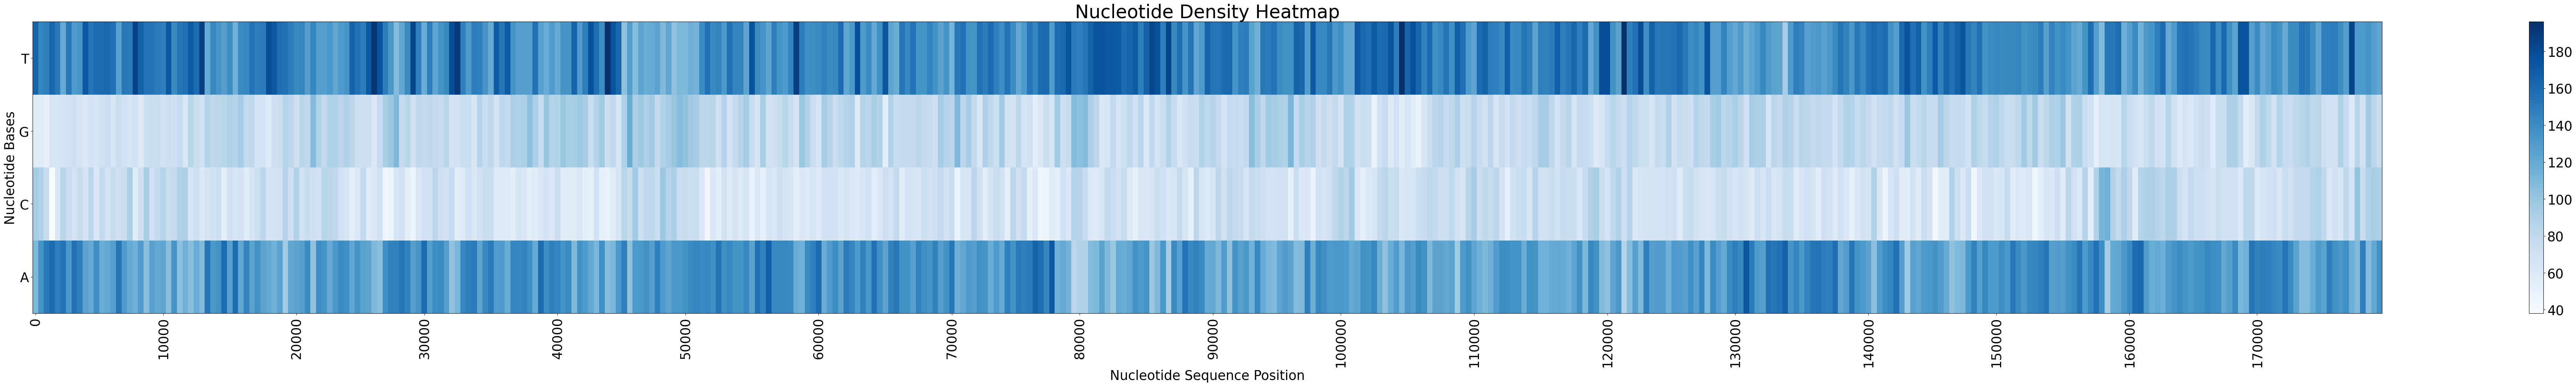

In [ ]:
#@title Nitrogenous Bases Distribution Across the Genome
nucleotide_locations= {**A_locations, **C_locations, **G_locations, **T_locations}
bin_size = 424
heatmap_data = np.zeros((len(nucleotide_locations), seq_length // bin_size))
nb_labels = list(nucleotide_locations.keys())
for i, nb in enumerate(nucleotide_locations):
    nb_locations = np.array(nucleotide_locations[nb])
    for j in range(seq_length // bin_size):
        heatmap_data[i, j] = np.sum((nb_locations >= j*bin_size) & (nb_locations < (j+1)*bin_size))
plt.figure(figsize=(100, 10))
plt.imshow(heatmap_data, cmap='Blues', origin = "lower", aspect='auto')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
cbar.ax.yaxis.offsetText.set_fontsize(25)

plt.yticks(np.arange(0, heatmap_data.shape[0]), nb_labels, fontsize=25)

xtick_labels = np.arange(0, 172000, 10000)
xtick_positions = xtick_labels // bin_size
plt.xticks(xtick_positions, xtick_labels, rotation = 90, fontsize=25)
plt.title("Nucleotide Density Heatmap", fontsize=35)
plt.ylabel("Nucleotide Bases", fontsize=25)
plt.xlabel("Nucleotide Sequence Position", fontsize=25)
plt.show()

The density of the nucleotides in the genome revealed a wide range of values across different genomic regions. 

The density of "A" varied from 150 counts up to approximately 290 counts in different regions,"C" exhibited a wide range of values, ranging from 125 counts to approximately 270 counts, "G" were ranging from 125 counts to approximately 240 counts, while "T" ranges from 180 to 330 counts respectuvely,  with some regions showing higher densities and others showing lower densities. 

The nucleotides appear to have uniform distribution across the genome. The peak count of each nucleotides appeared outside the high density range of their respective postion. The distribution of "A" in the genome have three distinct regions of high density in range 0 - 6500, 75000 - 79000, and 131000 - 113700, "C" and "G"  in 160000 and approximately 43000 - 50000 respectively, while "T" in 81000 - 87000 and 100000 - 160000 genome position.

---



##Statistical Analysis of Nitrogenous Bases Locations

+--------------------+--------------------+--------------------+-------------------+-------------------+
|     Statistics     |         A          |         C          |         G         |         T         |
+--------------------+--------------------+--------------------+-------------------+-------------------+
|        Mean        | 89804.84915183963  | 90722.97258213394  |  89429.9551191301 | 89349.47775286011 |
|       Median       |       89163        |       91978        |       88811       |      89628.0      |
|        Mode        |         -          |         -          |         -         |         -         |
|       Range        |       179455       |       179446       |       179448      |       179448      |
| Standard Deviation | 51991.52854008788  | 52529.56601390982  | 51213.03697561856 | 51603.13752037551 |
|      Variance      | 2703119039.9347725 | 2759355305.6097097 | 2622775156.266074 | 2662883801.946787 |
|        IQR         |      90365.0       |      90173.

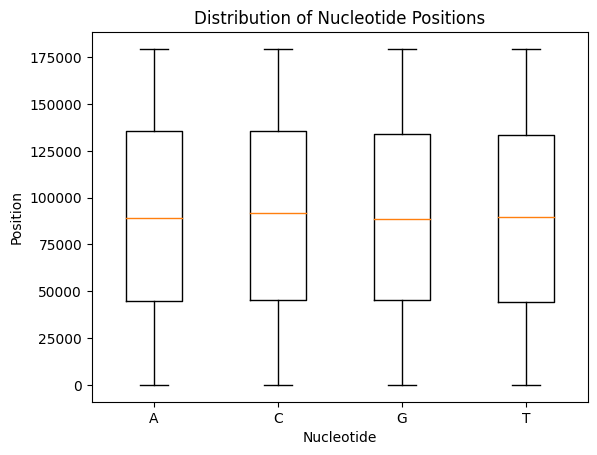

In [ ]:
#@title Descriptive Statistics { vertical-output: true }
meanA = statistics.mean(A_locations["A"])
meanC= statistics.mean(C_locations["C"])
meanG = statistics.mean(G_locations["G"])
meanT = statistics.mean(T_locations["T"])

medianA = statistics.median(A_locations["A"])
medianC = statistics.median(C_locations["C"])
medianG = statistics.median(G_locations["G"])
medianT = statistics.median(T_locations["T"])

data_rangeA = max(A_locations["A"]) - min(A_locations["A"])
data_rangeC = max(C_locations["C"]) - min(C_locations["C"])
data_rangeG = max(G_locations["G"]) - min(G_locations["G"])
data_rangeT = max(T_locations["T"]) - min(T_locations["T"])

valuesA = np.array(A_locations['A'])
valuesC = np.array(C_locations['C'])
valuesG = np.array(G_locations['G'])
valuesT = np.array(T_locations['T'])

q1A = np.quantile(valuesA, 0.25)
q3A = np.quantile(valuesA, 0.75)
iqrA = q3A - q1A

q1C = np.quantile(valuesC, 0.25)
q3C = np.quantile(valuesC, 0.75)
iqrC = q3C - q1C

q1G = np.quantile(valuesG, 0.25)
q3G = np.quantile(valuesG, 0.75)
iqrG = q3G - q1G

q1T = np.quantile(valuesT, 0.25)
q3T = np.quantile(valuesT, 0.75)
iqrT = q3T - q1T

stdevA = statistics.stdev(A_locations["A"])
stdevC = statistics.stdev(C_locations["C"])
stdevG = statistics.stdev(G_locations["G"])
stdevT = statistics.stdev(T_locations["T"])

varianceA = statistics.variance(A_locations["A"])
varianceC = statistics.variance(C_locations["C"])
varianceG = statistics.variance(G_locations["G"])
varianceT = statistics.variance(T_locations["T"])

table = PrettyTable()
table.field_names = ["Statistics", "A", "C", "G", "T"]
table.add_row(["Mean", meanA, meanC, meanG, meanT])
table.add_row(["Median", medianA, medianC, medianG, medianT ])
table.add_row(["Mode", "-", "-", "-", "-"])
table.add_row(["Range", data_rangeA, data_rangeC, data_rangeG, data_rangeT])
table.add_row(["Standard Deviation", stdevA, stdevC, stdevG, stdevT])
table.add_row(["Variance", varianceA, varianceC, varianceG, varianceT])
table.add_row(["IQR", iqrA, iqrC, iqrG, iqrT])

print(table)

A_values = list(A_locations.values())[0]
C_values = list(C_locations.values())[0]
G_values = list(G_locations.values())[0]
T_values = list(T_locations.values())[0]

data = [A_values, C_values, G_values, T_values]
plt.boxplot(data, labels=['A', 'C', 'G', 'T'])
plt.xlabel('Nucleotide')
plt.ylabel('Position')
plt.title('Distribution of Nucleotide Positions')
plt.show()

Descriptive statistics measure the central tendency and spread of the data.
Mean and median difference reveal that the data is not uniformly distributed across the genome. Range, Standard deviation, variance, and interquartile range values revealed that the difference betwwen the distribution of each nucleotide is almost the same.

---



In [ ]:
#@title Variability Analysis
combinations = list(combinations([A_locations, C_locations, G_locations, T_locations], 2))

table = PrettyTable()
table.field_names = ["Pairing", "U", "p-value"]

for c in combinations:
    group1_values = list(c[0].values())[0]
    group2_values = list(c[1].values())[0]
    statistic, pvalue = stats.mannwhitneyu(group1_values, group2_values, alternative='two-sided')

    pairing = f"{list(c[0].keys())[0]} vs. {list(c[1].keys())[0]}"
    if pvalue < 0.05:
        table.add_row([pairing, f"{statistic:.3f}", f"\033[32m{pvalue:.3f}\033[0m"])  # Set p-value to green if it's less than 0.05
    else:
        table.add_row([pairing, f"{statistic:.3f}", f"\033[31m{pvalue:.3f}\033[0m"])  # Set p-value to red if it's greater than or equal to 0.05

print(table)


+---------+----------------+---------+
| Pairing |       U        | p-value |
+---------+----------------+---------+
| A vs. C | 803083244.000  |  0.015  |
| A vs. G | 924695062.000  |  0.294  |
| A vs. T | 1715366963.000 |  0.137  |
| C vs. G | 492521416.000  |  0.002  |
| C vs. T | 913862901.000  |  0.000  |
| G vs. T | 1022379281.000 |  0.820  |
+---------+----------------+---------+


The Mann-Whitney U test was used to compare the IQR values of the four nucleotide bases (A, C, G, and T) across the genome. The test revealed significant differences in IQR values between the pairs of nucleotide bases A and C (U = 803083244.000, p = 0.015), C and G (U = 492521416.000, p = 0.002), and C and T (U = 913862901.000, p = 0.000). However, no significant differences were found between the pairs of nucleotide bases A and G (U = 924695062.000, p = 0.294), A and T (U = 1715366963.000, p = 0.137), and G and T (U = 1022379281.000, p = 0.820).

The results suggest that the IQR values of some pairs of nucleotide bases across the genome are significantly different from each other. Specifically, the IQR values of C and A, C and G, and C and T are significantly different. These findings provide insights into the distribution and variability of nucleotide bases across the genome, which could be relevant to various biological studies.

---



##References



> Doolittle, W. F., & Zhaxybayeva, O. (2010). Metagenomics and the units of biological organization. BioScience, 60(2), 102-112. doi: 10.1525/bio.2010.60.2.8

> Kuo, C. H., & Ochman, H. (2009). The fate of new bacterial genes. FEMS microbiology reviews, 33(3), 38. doi: 10.1111/j.1574-6976.2008.00144.x

> Lassalle, F., Campillo, T., Vial, L., Baude, J., Costechareyre, D., Chapulliot, D., ... & Jacques, M. A. (2015). Genomic species are ecological species as revealed by comparative genomics in Agrobacterium tumefaciens. Genome biology and evolution, 7(10), 2690-2703. doi: 10.1093/gbe/evv179

> Tettelin, H., Masignani, V., Cieslewicz, M. J., Donati, C., Medini, D., Ward, N. L., ... & Fraser, C. M. (2005). Genome analysis of multiple pathogenic isolates of Streptococcus agalactiae: implications for the microbial “pan-genome”. Proceedings of the National Academy of Sciences, 102(39), 13950-13955. doi: 10.1073/pnas.0506758102

> Wu, M., & Scott, A. J. (2012). Phylogenomic analysis of bacterial and archaeal sequences with AMPHORA2. Bioinformatics, 28(7), 1033-1034. doi: 10.1093/bioinformatics/bts079

---











**Disclaimer: This work is solely the creation of Joseph De Luna and should not be used or reproduced without permission.**

